In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print(".", end="")
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end="")
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print()
    return df

In [3]:
# Load Ar39
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_08_18_2020", "Ar39_Snapshots")
prefix = "Snapshot1Ar39*csv"
df_1ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
df_1ar39 = df_1ar39[df_1ar39.columns[:-1]]

prefix = "Snapshot2Ar39*csv"
df_2ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
df_2ar39 = df_2ar39[df_2ar39.columns[:-1]]

prefix = "Snapshot3Ar39*csv"
df_3ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
df_3ar39 = df_3ar39[df_3ar39.columns[:-1]]

prefix = "Snapshot4Ar39*csv"
df_4ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
df_4ar39 = df_4ar39[df_4ar39.columns[:-1]]

prefix = "Snapshot5Ar39*csv"
df_5ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
df_5ar39 = df_5ar39[df_5ar39.columns[:-1]]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................


In [9]:
# Load Ar39
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_07_15_2020", "Muons_Snapshots")
prefix = "SnapshotMuon*csv"

df_mu = load_dataframe_from_files(dirin, prefix, max_files=200)
df_mu = df_mu[df_mu.columns[:-1]]
df_mu = df_mu[df_mu.pedetected>0]

........................................................................................................................................................................................................


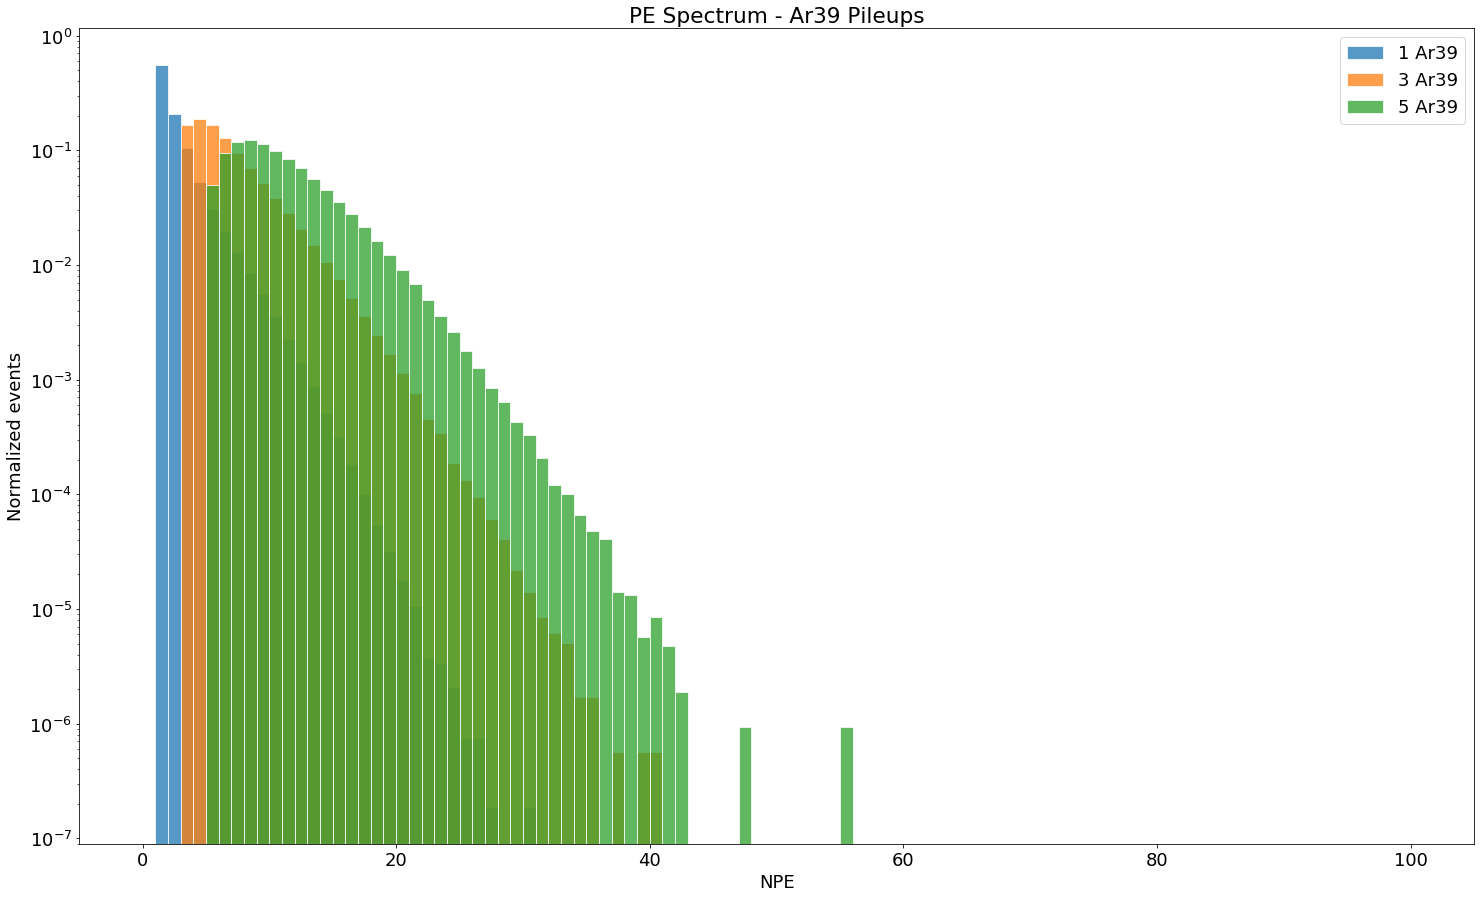

In [16]:
bins=np.linspace(0, 100, 101)
plt.hist(df_1ar39.pedetected, bins=bins, density=True, alpha=0.75, edgecolor='w', label="1 Ar39")
plt.hist(df_3ar39.pedetected, bins=bins, density=True, alpha=0.75, edgecolor='w', label="3 Ar39")
plt.hist(df_5ar39.pedetected, bins=bins, density=True, alpha=0.75, edgecolor='w', label="5 Ar39")
plt.title("PE Spectrum - Ar39 Pileups")
plt.yscale("log")
plt.legend()
plt.xlabel("NPE")
plt.ylabel("Normalized events")
plt.show()

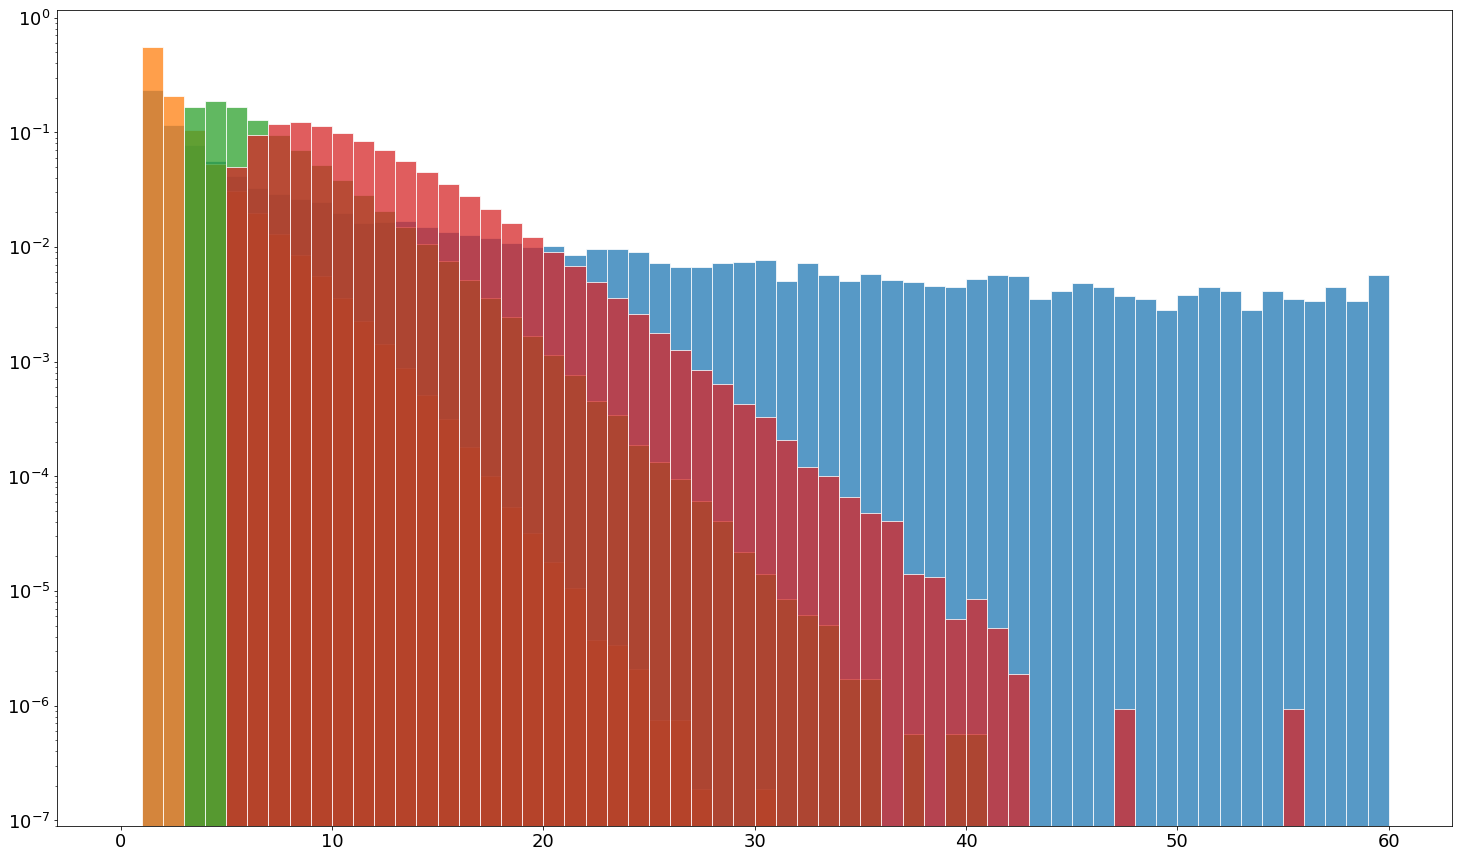

In [20]:
upperbound = 61
bins=np.linspace(0, 60, 61)
plt.hist(df_mu[df_mu.pedetected<upperbound].pedetected, bins=bins, density=True, alpha=0.75, edgecolor='w')
plt.hist(df_1ar39.pedetected, bins=bins, density=True, alpha=0.75, edgecolor='w')
plt.hist(df_3ar39.pedetected, bins=bins, density=True, alpha=0.75, edgecolor='w')
plt.hist(df_5ar39.pedetected, bins=bins, density=True, alpha=0.75, edgecolor='w')
plt.yscale("log")
#plt.xscale("log")
plt.show()

In [22]:
print("[Info] There are {} Muons with energy < {} ({} %)".format(len(df_mu[df_mu.pedetected<upperbound]), upperbound,
                                                                len(df_mu[df_mu.pedetected<upperbound])/len(df_mu)))

[Info] There are 8884 Muons with energy < 61 (0.3046848206324165 %)


In [23]:
df_lemu = df_mu[df_mu.pedetected<upperbound]

In [24]:
df_lemu.pedetected.describe()

count    8884.000000
mean       11.953399
std        14.654053
min         1.000000
25%         2.000000
50%         5.000000
75%        17.000000
max        60.000000
Name: pedetected, dtype: float64

In [26]:
len(df_1ar39)/10000000

0.5303515